https://developer.spotify.com/dashboard/login
https://stackoverflow.com/questions/38664235/how-to-look-up-spotify-ids-song-track-ids-in-bulk
#### audio features
https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

#### search strings
https://developer.spotify.com/documentation/web-api/reference/#/operations/search

#### spotipy
https://github.com/spotipy-dev/spotipy/blob/master/examples/search.py

#### basics
https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

#### more search strings
https://stackoverflow.com/questions/68511910/how-to-search-spotify-api-for-tracks-with-a-specific-genre

#### more spotipy
https://www.grace-dev.com/python-apis/python-spotify-api/

#### using requests
https://lvngd.com/blog/accessing-spotify-api-python/

#### spotipy
https://medium.com/@tholterman5/how-to-use-spotipy-the-python-library-for-using-the-spotify-api-c4f36e90f7eb

#### Everynoise - Spotify Genres
https://everynoise.com/everynoise1d.cgi

#### full list of genres (thousands)
https://everynoise.com/everynoise1d.cgi?scope=all

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import requests
import random
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

# auth_info = pd.DataFrame(columns = ['id', 'secret'], data = [[client_id, client_secret]])
# auth_info.to_csv('auth_info.csv', index = False)

auth_info = pd.read_csv('auth_info.csv')
client_id = auth_info['id'][0]
client_secret = auth_info['secret'][0]

In [2]:
# using requests
auth_url = 'https://accounts.spotify.com/api/token'
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}

auth_response = requests.post(auth_url, data=data)
access_token = auth_response.json().get('access_token')
headers = {
    'Authorization': 'Bearer {}'.format(access_token)
}

In [3]:
# genres pulled directly (copy paste lol) from everynoise.com
genres = '1☊pop2☊dance pop3☊rap4☊rock5☊hip hop6☊urbano latino7☊pop rap8☊edm9☊reggaeton10☊trap11☊modern rock12☊latin pop13☊r&b14☊classic rock15☊pop dance16☊musica mexicana17☊trap latino18☊permanent wave19☊tropical house20☊post-teen pop21☊mellow gold22☊k-pop23☊alternative metal24☊soft rock25☊pop rock26☊nueva musica mexicana27☊album rock28☊canadian pop29☊filmi30☊desi pop31☊electropop32☊contemporary country33☊urban contemporary34☊country35☊melodic rap36☊southern hip hop37☊indie pop38☊modern bollywood39☊electro house40☊alternative rock41☊hard rock42☊nu metal43☊uk pop44☊latin hip hop45☊rock en espanol46☊corrido47☊sad sierreno48☊viral rap49☊gangster rap50☊adult standards51☊tropical52☊art pop53☊neo mellow54☊ranchera55☊atl hip hop56☊alt z57☊country road58☊new wave pop59☊arrocha60☊colombian pop61☊french hip hop62☊pop urbaine63☊underground hip hop64☊latin alternative65☊norteno66☊art rock67☊german hip hop68☊country rock69☊latin rock70☊mexican pop71☊folk rock72☊funk carioca73☊j-pop74☊reggaeton colombiano75☊sierreno76☊house77☊k-pop boy group78☊soul79☊sertanejo universitario80☊metal81☊europop82☊neo soul83☊sertanejo84☊chicago rap85☊latin arena pop86☊indie rock87☊hip pop88☊corridos tumbados89☊canadian hip hop90☊canadian contemporary r&b91☊modern alternative rock92☊sertanejo pop93☊k-pop girl group94☊toronto rap95☊post-grunge96☊reggaeton flow97☊new wave98☊stomp and holler99☊banda100☊conscious hip hop101☊indonesian pop102☊indie folk103☊trap argentino104☊blues rock105☊pop punk106☊singer-songwriter107☊italian hip hop108☊rap metal109☊spanish pop110☊bedroom pop111☊east coast hip hop112☊psychedelic rock113☊francoton114☊funk115☊desi hip hop116☊dark trap117☊viral pop118☊new romantic119☊emo rap120☊indie poptimism121☊quiet storm122☊hoerspiel123☊west coast rap124☊alternative r&b125☊miami hip hop126☊indie soul127☊puerto rican pop128☊slap house129☊boy band130☊argentine hip hop131☊rap francais132☊lounge133☊alternative hip hop134☊progressive house135☊punjabi pop136☊uk dance137☊glam rock138☊piano rock139☊sleep140☊electronica141☊argentine rock142☊indietronica143☊chill r&b144☊punk145☊drift phonk146☊ccm147☊disco148☊folk149☊mpb150☊detroit hip hop151☊big room152☊australian pop153☊german pop154☊new french touch155☊indie r&b156☊pop edm157☊vapor trap158☊tamil pop159☊metropopolis160☊opm161☊mexican hip hop162☊turkish pop163☊swedish pop164☊hardcore hip hop165☊italian pop166☊roots rock167☊classical168☊anime169☊urbano espanol170☊garage rock171☊pagode172☊rap rock173☊metalcore174☊talent show175☊nigerian pop176☊heartland rock177☊worship178☊folk-pop179☊synthpop180☊hollywood181☊christian music182☊british soul183☊pop nacional184☊french pop185☊dance rock186☊j-rock187☊escape room188☊sad rap189☊uk hip hop190☊lgbtq+ hip hop191☊polish hip hop192☊yacht rock193☊memphis hip hop194☊contemporary r&b195☊j-poprock196☊soundtrack197☊pop venezolano198☊grupera199☊progressive electro house200☊sad lo-fi201☊italian adult pop202☊mariachi203☊funk mtg204☊glam metal205☊alternative dance206☊classic soul207☊world worship208☊pop r&b209☊lo-fi beats210☊funk metal211☊gen z singer-songwriter212☊dirty south rap213☊forro214☊vocal jazz215☊pluggnb216☊rock-and-roll217☊trap triste218☊brostep219☊brazilian rock220☊dream pop221☊trap italiana222☊aesthetic rap223☊christian alternative rock224☊beatlesque225☊rap conscient226☊funk rj227☊salsa228☊new americana229☊trap queen230☊melancholia231☊british invasion232☊mandopop233☊cantautor234☊eurodance235☊urbano mexicano236☊queens hip hop237☊orchestral soundtrack238☊cali rap239☊mexican rock240☊emo241☊pop soul242☊classic bollywood243☊grunge244☊russian hip hop245☊pixel246☊melodic metalcore247☊modern country rock248☊dutch pop249☊g funk250☊pop reggaeton251☊melodic drill252☊symphonic rock253☊country pop254☊brazilian hip hop255☊bachata256☊white noise257☊new orleans rap258☊trance259☊outlaw country260☊dfw rap261☊urbano chileno262☊screamo263☊r&b en espanol264☊trap brasileiro265☊australian dance266☊new rave267☊funk rock268☊kleine hoerspiel269☊trap boricua270☊easy listening271☊nova mpb272☊bubblegum pop273☊brooklyn drill274☊german rock275☊compositional ambient276☊progressive rock277☊barbadian pop278☊japanese teen pop279☊chanson280☊neo-classical281☊florida rap282☊industrial metal283☊sheffield indie284☊dancehall285☊oklahoma country286☊brazilian gospel287☊rockabilly288☊gruperas inmortales289☊uk contemporary r&b290☊axe291☊german trap292☊bolero293☊plugg294☊show tunes295☊atl trap296☊lo-fi chill297☊australian rock298☊country dawn299☊social media pop300☊shimmer pop301☊britpop302☊dutch edm303☊modern indie pop304☊turkish rock305☊reggae fusion306☊power metal307☊downtempo308☊vapor soul309☊funk ostentacao310☊bossa nova311☊acoustic pop312☊dutch hip hop313☊baroque pop314☊texas country315☊anime rock316☊rap canario317☊girl group318☊north carolina hip hop319☊electronic trap320☊latin viral pop321☊old school thrash322☊polish trap323☊pittsburgh rap324☊turkish trap325☊deep house326☊norwegian pop327☊deep groove house328☊lilith329☊afrofuturism330☊modern blues rock331☊sophisti-pop332☊video game music333☊pop argentino334☊turkish hip hop335☊afropop336☊adoracao337☊rap calme338☊covertronica339☊hyperpop340☊candy pop341☊merseybeat342☊la indie343☊punjabi hip hop344☊nyc rap345☊lo-fi indie346☊spanish hip hop347☊philly rap'
genres = genres.split('☊')
len(genres)
genres[:5]
# remove the first element
genres = genres[1:]
# remove the number at the end of each element
import re
genres = [re.sub(r"(\d+)", '', genre) for genre in genres]
print(genres[:5])
print(len(genres))

['pop', 'dance pop', 'rap', 'rock', 'hip hop']
347


If you've got a Python program and you want to make it wait, you can use a simple function like this one: time.sleep(x) where x is the number of seconds that you want your program to wait

In [4]:
# create a list of years from 1960 to 2023
years = list(range(2020, 2023))
pop_genres = genres[:5]
# genres and years will be the iterators

In [5]:
# genres = ['Electronic', 'Pop', 'Rap', 'Rock', 'Country']

song_data = []

for genre in pop_genres:
    for year in years:
        for i in range(20):
            url = f'https://api.spotify.com/v1/search?type=track&q=genre:{genre}&year:{year}&limit=50&offset={i*50}'
            # print(url)
            response = requests.get(url,headers=headers)
            try: #catch 429 errors from rate limits or nonexistent URI
                tracks = response.json().get('tracks').get('items')
                for track in tracks:
                    song_info = {}
                    uri = track['uri'].split(':')[2]
                    song_info['popularity'] = track['popularity']
                    song_info['year'] = year
                    song_info['genre'] = genre

                    audio_url = f'https://api.spotify.com/v1/audio-features/{uri}'
                    audio = requests.get(audio_url,headers=headers).json()
                    song_info.update(audio)
            
                    song_data.append(song_info)
                    time.sleep(0.03)
            except:
                pass

print(len(song_data))


14990


28 min to retrieve 15k songs. 

In [ ]:
songs_df = pd.DataFrame(song_data)

In [8]:
songs_df.genre.value_counts()

pop          3000
dance pop    3000
rock         3000
hip hop      3000
rap          2990
Name: genre, dtype: int64

In [15]:
# the resulting csv has 15k observations, 
# with 1000 for each genre in pop, dance pop, rap, rock, and hiphop
# and the years 2020, 2021, 2022
songs_df.to_csv('top5genres2020_2022.csv', index=False)

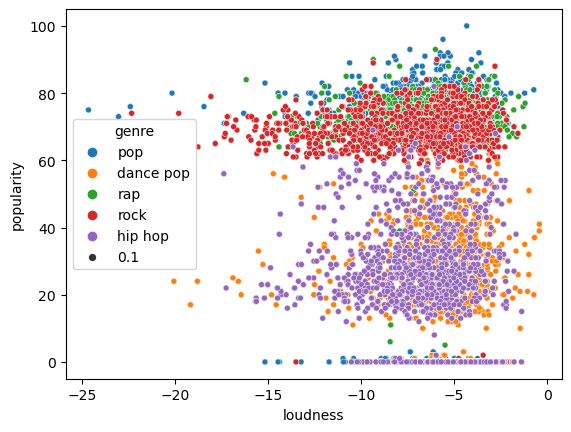

In [14]:
songs_df = pd.read_csv('top5genres2020_2022.csv')
sns.scatterplot(x='loudness', y='popularity', data=songs_df, hue='genre', size = 0.1)
plt.show()

Seems to be 2 clusters, 1 for pop/rap/rock and the other for hip hop/dance pop. 

[(-20.0, 0.0)]

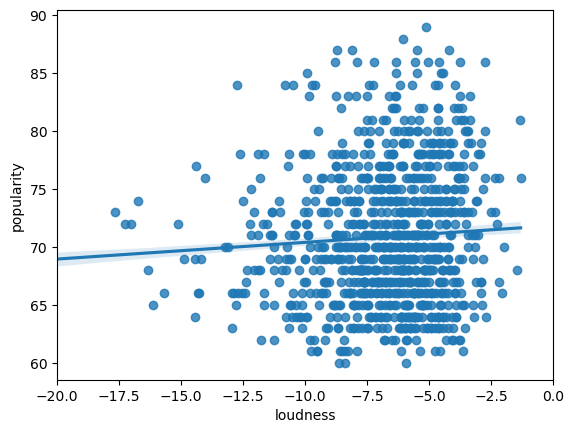

In [47]:
# OLD VISUALIZATION CODE

song_data = pd.DataFrame(song_data)
song_data.head()
# song_data.plot(kind = "scatter", x = "loudness", y = "popularity")
ax = sns.regplot(data = song_data, x = "loudness", y = "popularity")
# ax.set(xlim = (-20,0))
# sns.barplot(data = song_data, x = "mode", y = "popularity")